# Лабораторная работа 2. Линейная регрессия. Градиентный спуск

Вспомним нормальное уравнение:

$$\overrightarrow{w}_{opt} = \left(X^TX\right)^{-1}X^T\overrightarrow{y}.$$

Здесь присутствует обращение матрицы $X^TX$ – довольно трудоёмкая операция при большом количестве признаков: сложность вычислений $O(d^3)$. При решении реальных задач такая трудоёмкость часто оказывается непозволительной, поэтому параметры модели (весовые коэффициенты) ищут итерационными методами, стоимость которых меньше. Один из них – *градиентный спуск* (gradient descent – ['greɪdɪənt dɪ'sent]).

Напомним, что в градиентном спуске значения параметров на следующем шаге получаются из значений параметров на текущем шаге смещением в сторону антиградиента функционала ошибки: 

$$\overrightarrow{w}^{(k+1)} = \overrightarrow{w}^{(k)} - \eta_k \nabla Q(\overrightarrow{w}^{(k)}),$$
где $\eta_k$ – шаг градиентного спуска.

Формула градиента функционала ошибки выглядит следующим образом:

$$\nabla Q(\overrightarrow{w}) = \nabla_\overrightarrow{w}\left(\frac{1}{l}\|X\overrightarrow{w}-\overrightarrow{y}\|^2\right) = \frac{2}{l}X^T(X\overrightarrow{w} - \overrightarrow{y}).$$
 
Сложность вычислений в данном случае $O(dl)$.

**Задание 1. Реализация градиентного спуска**  

Напишите функцию `gradient_descent`, которая находит вектор весов на основе градиентного спуска.  

В качестве критериев остановки можно использовать максимальное количество шагов и/или количество шагов, при котором отсутствуют значимые изменения весов.

Проверьте работу функции на простом примере из лекций:

$$x_1=2, x_2=3, x_3=5,$$

$$y_1=1, y_2=3, y_3=4.$$

Нарисуйте исходные данные и полученную линию регресии при помощи ``matplotlib``: для рисования точек используйте ``plt.scatter``, для рисования линии – ``plt.plot``.  

Сравните полученные результаты с результатами, полученными на основе нормального уравнения.

***Решение***

В градиентном спуске значения параметров на следующем шаге получаются из значений параметров на текущем шаге смещением в сторону антиградиента функционала ошибки: 

$$\overrightarrow{w}^{(k+1)} = \overrightarrow{w}^{(k)} - \eta_k \nabla Q(\overrightarrow{w}^{(k)}),$$
где $\eta_k$ – шаг градиентного спуска.

Формула градиента функционала ошибки выглядит следующим образом:

$$\nabla Q(\overrightarrow{w}) = \nabla_\overrightarrow{w}\left(\frac{1}{l}\|X\overrightarrow{w}-\overrightarrow{y}\|^2\right) = \frac{2}{l}X^T(X\overrightarrow{w} - \overrightarrow{y}).$$
 
x = [2.0, 3.0, 5.0]

y = [1.0, 3.0, 4.0]

w = [-2.0, 2.0]

n = 0.046

x = [[1. 2.]
 [1. 3.]
 [1. 5.]]
 
 x*w = [2. 4. 8.]
 
 x*w-y = [1. 1. 4.]
 
 x.T*(x*w-y) = [ 6. 25.]
 
 (2/l)*x.T*(x*w-y) = [ 4.         16.66666667]
 
 w_1 = w_0 - n * gradient = [-2.0, 2.0] - 0.046 * [ 4.         16.66666667] = [-2.184, 1.23333333318]

In [2]:
import numpy as np
import scipy.linalg as sla
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [463]:
# Проверка примера 
def gradient_descent(X, y, w, learn_rate, n_iter, eps):
    x = np.array([np.ones(X.shape[0]), X]).T
    
    print('x = ', x)
    print('y = ', y)
    print('w = ', w)
        
    k_iter = 0
    
    for _ in range(n_iter):
        print('x * w = ', np.dot(x, w))
        print('x * w - y = ', np.dot(x, w) - y)
        print('x.T * (x * w - y) = ', np.dot(x.T, np.dot(x, w) - y))
        
        gradient = 2 * np.dot(x.T, np.dot(x, w) - y) / y.shape[0]
        print('gradient = ', gradient)
        
        diff = learn_rate * gradient
        print('learn_rate * gradient = ', diff)
        w -= diff
        print('w = ', w)
        k_iter += 1
        
        if np.all(np.abs(diff) <= eps):
            break        
    return w, k_iter

X = np.array([2.0, 3.0, 5.0])
y = np.array([1.0, 3.0, 4.0])
w_0 = np.array([-2.0, 2.0])

# Иллюстрация одной итерации нахождения коэффициентов на основе градиентного спуска
w, k = gradient_descent(X, y, w, learn_rate = 0.046, n_iter = 1, eps = 1e-06)
print('\nw = ', w,' количество итераций = ', k)

x =  [[1. 2.]
 [1. 3.]
 [1. 5.]]
y =  [1. 3. 4.]
w =  [ 5.68907176e+16 -1.53719231e+16]
x * w =  [ 2.61468715e+16  1.07749484e+16 -1.99688977e+16]
x * w - y =  [ 2.61468715e+16  1.07749484e+16 -1.99688977e+16]
x.T * (x * w - y) =  [ 1.69529222e+16 -1.52259004e+16]
gradient =  [ 1.13019481e+16 -1.01506003e+16]
learn_rate * gradient =  [ 5.19889613e+14 -4.66927613e+14]
w =  [ 5.63708280e+16 -1.49049955e+16]

w =  [ 5.63708280e+16 -1.49049955e+16]  количество итераций =  1


In [464]:
# Функция нахождения вектора весов на основе градиентного спуска 
def gradient_descent(X, y, w, learn_rate, n_iter, eps):
    x = np.array([np.ones(X.shape[0]), X]).T
    k_iter = 0
    for _ in range(n_iter):
        gradient = 2 * np.dot(x.T, np.dot(x, w) - y) / y.shape[0]
        diff = learn_rate * gradient
        w -= diff
        k_iter += 1
        if np.all(np.abs(diff) <= eps):
            break        
    return w, k_iter

In [465]:
# Функция нахождения значений по линейной функции с предсказанными весовыми коэффициентами
def lin_f_predict(X, w):
    X = np.array([np.ones(X.shape[0]), X]).T
    y_predict = np.dot(w, X.T)
    return y_predict

In [466]:
# Функция отрисовки
def paint(X, y, y_predict, y_predict_normal):
    m = 1
    plt.scatter(X, y, 40, 'g', 'o', alpha=0.8, label='Исходные данные')
    plt.plot(X, y_predict, 'b', alpha=0.8, label='Линия регрессии по градиентному спуску') # Построение линейной регрессии по град.спуску
    plt.plot(X, y_predict_normal, 'r', alpha=0.8, label='Линия регресси по нормальному уравнению') # Построение линейной регрессии по нормальному уравнению
    plt.xlim(X.min() - m, X.max() + m)
    plt.ylim(y.min() - m, y.max() + m)
    plt.legend(loc = 'best', prop = {'size': 10})
    plt.title('Сравнение результатов линейной регрессии на основе градиентного спуска и нормального уравнения')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [467]:
# Функции ошибок

def MSE(y_test, y_predict):
        
    # Ваш код здесь
    mse = np.sum((y_test - y_predict) ** 2) / len(y_test)
    return mse  # Возвращаем значение ошибки

def RMSE(y_test, y_predict):
        
    # Ваш код здесь
    rmse = np.sqrt(np.sum((y_test - y_predict) ** 2) / len(y_test))
    return rmse # Возвращаем значение ошибки

def R2(y_test, y_predict):
    import statistics    
    # Ваш код здесь
    r2 = 1 - np.sum((y_test - y_predict) ** 2) / np.sum((y_test - np.sum(y_test) / len(y_test)) ** 2)
    return r2  # Возвращаем значение ошибки


Нормальное уравнение:

w =  [-0.42857143  0.92857143]

Градиентный спуск (скорость обучения =  0.046 ):

w =  [-1.02823589  1.08782098]  Количество итераций =  100
MSE =  0.2584731858095931  scikit-learn MSE =  0.2584731858095931
RMSE =  0.5084025824182968
R2 =  0.8338386662652615  scikit-learn R2_score =  0.8338386662652615


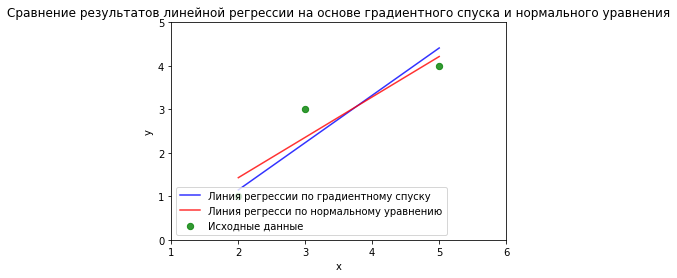


Градиентный спуск (скорость обучения =  0.066 ):

w =  [-0.55884148  0.96316652]  Количество итераций =  100
MSE =  0.21637102935901673  scikit-learn MSE =  0.21637102935901673
RMSE =  0.4651569943137658
R2 =  0.8609043382692035  scikit-learn R2_score =  0.8609043382692035


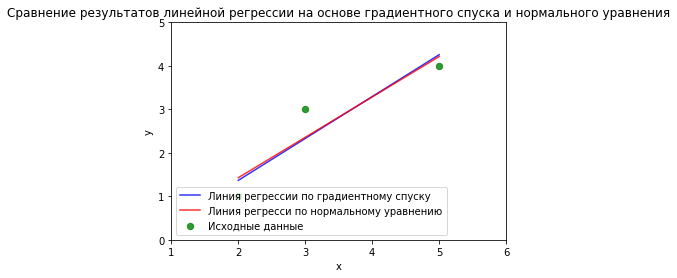


Градиентный спуск (скорость обучения =  0.086 ):

w =  [-0.44641613  0.93286915]  Количество итераций =  100
MSE =  0.21432682910122883  scikit-learn MSE =  0.21432682910122883
RMSE =  0.462954456832666
R2 =  0.8622184670063529  scikit-learn R2_score =  0.8622184670063529


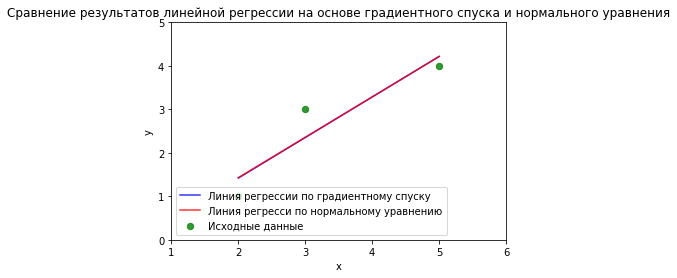

In [471]:
# Функция нахождения значений по линейной функции с предсказанными весовыми коэффициентами
def lin_reg(X, w):
    X = np.array([np.ones(X.shape[0]), X]).T
    y_predict = np.dot(w, X.T)
    return y_predict

# Функция нахождения вектора весов на основе нормального уравнения 
def get_weight(X, y):
    X = np.array([np.ones(X.shape[0]), X]).T
    w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
    return w  # Возвращаем вектор весов

X = np.array([2.0, 3.0, 5.0])
y = np.array([1.0, 3.0, 4.0])
w_0 = np.array([-2.0, 2.0])

# Нахождение коэффициентов на основе нормального уравнения
w = get_weight(X, y)
y_predict_normal = lin_reg(X, w)
print('\nНормальное уравнение:\n')
print('w = ', w)

for learn_rate in [0.046, 0.066, 0.086]:
    w, k = gradient_descent(X, y, w_0, learn_rate, n_iter=100, eps=1e-06)
    y_predict = lin_f_predict(X, w)
    print('\nГрадиентный спуск (скорость обучения = ', learn_rate, '):\n')
    print('w = ', w, ' Количество итераций = ', k)
    print('MSE = ', MSE(y, y_predict), ' scikit-learn MSE = ', mean_squared_error(y, y_predict))
    print('RMSE = ', RMSE(y, y_predict))
    print('R2 = ', R2(y, y_predict), ' scikit-learn R2_score = ', r2_score(y, y_predict))
    paint(X, y, y_predict, y_predict_normal)


**Задание 2. Исследование скорости спуска**  

Протестируйте функцию `gradient_descent` на наборе данных `ml_lab1_train.txt`/`ml_lab1_test.txt` для разных значений скорости спуска $\eta_k$, например, $\eta_k = \{0.5, 1.0, 2.0\}$.  

Оцените количество шагов для получения решения в каждом случае.

In [452]:
# Отрисовка
def paint_2(X_train, y_train, X_test, y_test, y_predict):
    m = 1
    x_min = min(X_train.min(), X_test.min())
    x_max = max(X_train.max(), X_test.max())
    y_min = min(y_train.min(), y_test.min(), y_predict.min())
    y_max = max(y_train.max(), y_test.max(), y_predict.max())
    plt.scatter(X_train, y_train, 40, 'g', 'o', alpha=0.8, label='train')
    plt.scatter(X_test, y_test, 40, 'b', 'x', alpha=0.8, label='test')
    plt.plot(X_train, y_predict, 'r', alpha=0.8, label='predict')
    plt.xlim(x_min - m, x_max + m)
    plt.ylim(y_min - m, y_max + m)
    plt.legend(loc = 'best', prop = {'size': 10})
    plt.title('Fitted gradient_descent')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [453]:
# Загрузка данных
data_train = np.loadtxt('ml_lab1_train.txt', delimiter=',')
data_test = np.loadtxt('ml_lab1_test.txt', delimiter=',')
# Разделение данных и целевых значений для обучающих данных
X_train = data_train[:,0]
y_train = data_train[:,1]
# Разделение данных и целевых значений для тестовых данных
X_test = data_test[:,0]
y_test = data_test[:,1]



Градиентный спуск (скорость обучения =  0.5 ):

w =  [4.43322761 2.27914182]  Количество итераций =  87

Ошибка на обучающем наборе:
MSE =  0.29689663326973725  scikit-learn MSE =  0.29689663326973725
RMSE =  0.544882219630754
R2 =  0.6978349896044439  scikit-learn R2_score =  0.6978349896044439

Ошибка на тестовом наборе:
MSE =  0.4351198933050878  scikit-learn MSE =  0.4351198933050878
RMSE =  0.6596361825317709
R2 =  0.6848803556237482  scikit-learn R2_score =  0.6848803556237482


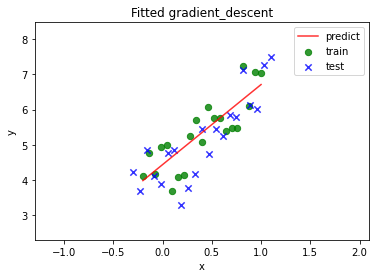


Градиентный спуск (скорость обучения =  1.0 ):

w =  [4.43322936 2.27913792]  Количество итераций =  3

Ошибка на обучающем наборе:
MSE =  0.2968966332640992  scikit-learn MSE =  0.2968966332640992
RMSE =  0.5448822196255804
R2 =  0.697834989610182  scikit-learn R2_score =  0.697834989610182

Ошибка на тестовом наборе:
MSE =  0.43512005673195764  scikit-learn MSE =  0.43512005673195764
RMSE =  0.6596363064082795
R2 =  0.684880237267824  scikit-learn R2_score =  0.684880237267824


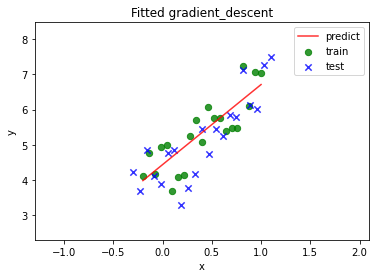


Градиентный спуск (скорость обучения =  2.0 ):

w =  [4.43323043 2.27913554]  Количество итераций =  2

Ошибка на обучающем наборе:
MSE =  0.29689663326266685  scikit-learn MSE =  0.29689663326266685
RMSE =  0.544882219624266
R2 =  0.6978349896116398  scikit-learn R2_score =  0.6978349896116398

Ошибка на тестовом наборе:
MSE =  0.43512015653162833  scikit-learn MSE =  0.43512015653162833
RMSE =  0.6596363820557719
R2 =  0.6848801649915681  scikit-learn R2_score =  0.6848801649915681


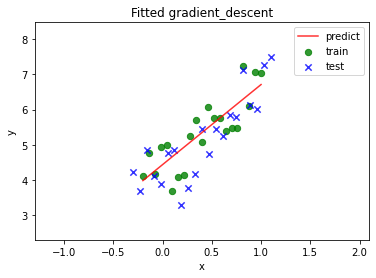

In [472]:
# Градиентный спуск
w_0 = np.array([1.0, 1.0]) # Начальный вектор коэффициентов (весов)
for learn_rate in [0.5, 1.0, 2.0]:
    w, k = gradient_descent(X_train, y_train, w_0, learn_rate, n_iter=100, eps=1e-06)
    print('\nГрадиентный спуск (скорость обучения = ', learn_rate, '):\n')
    print('w = ', w, ' Количество итераций = ', k)
    print('\nОшибка на обучающем наборе:')
    y_predict_train = lin_f_predict(X_train, w)
    print('MSE = ', MSE(y_train, y_predict_train), ' scikit-learn MSE = ', mean_squared_error(y_train, y_predict_train))
    print('RMSE = ', RMSE(y_train, y_predict_train))
    print('R2 = ', R2(y_train, y_predict_train), ' scikit-learn R2_score = ', r2_score(y_train, y_predict_train))
    print('\nОшибка на тестовом наборе:')
    y_predict_test = lin_f_predict(X_test, w)
    print('MSE = ', MSE(y_test, y_predict_test), ' scikit-learn MSE = ', mean_squared_error(y_test, y_predict_test))
    print('RMSE = ', RMSE(y_test, y_predict_test))
    print('R2 = ', R2(y_test, y_predict_test), ' scikit-learn R2_score = ', r2_score(y_test, y_predict_test))
    paint_2(X_train, y_train, X_test, y_test, y_predict_train)

**Задание 3. Стохастический градиентный спуск**  

Стохастический градиентный спуск отличается от обычного заменой градиента на его оценку по одному или нескольким объектам. В этом случае сложность становится $O(kd)$, где $k$ – количество объектов, по которым оценивается градиент, $k<<l$. Это отчасти объясняет популярность стохастических методов оптимизации.  

Реализуйте функцию `stochastic_gradient_descent`, которая находит вектор весов на основе стохастического градиентного спуска (вычисление градиента на одном случайном примере).  

На наборе данных `ml_lab1_train.txt`/`ml_lab1_test.txt` оцените количество шагов для получения решения при разных значениях скорости спуска $\eta_k$, например, $\eta_k = \{0.5, 1.0, 2.0\}$.

In [474]:
# Стохастический градиентный спуск (вычисление градиента на одном случайном примере на каждой интерации)
def stochastic_gradient_descent(X, y, w, learn_rate, n_iter, eps):
    x = np.array([np.ones(X.shape[0]), X]).T
    n_obs = x.shape[0] # Количество наблюдений (значений/примеров)
       
    k_iter = 0 # Число выполненных итераций
    n = learn_rate # Начальный коэффициент скорости обучения
    for _ in range(n_iter):
        start = np.random.randint(n_obs) # Выбор случайного значения (примера)
        x_batch = np.array([x[start]])
        y_batch = np.array([y[start]])        
        gradient = 2 * np.dot(x_batch.T, np.dot(x_batch, w) - y_batch) / y_batch.shape[0]
        diff = learn_rate * gradient
        w -= diff  
        k_iter += 1
        if np.all(np.abs(diff) <= eps):
            break     
        learn_rate -= n / n_iter # Уменьшение коэффициента скорости обучения
    return w, k_iter


Стохастический градиентный спуск (скорость обучения =  0.5 ):

w =  [4.36112738 2.47419997]  Количество итераций =  100

Ошибка на обучающем наборе:
MSE =  0.30195438231047805  scikit-learn MSE =  0.30195438231047805
RMSE =  0.5495037600512649
R2 =  0.6926874917206094  scikit-learn R2_score =  0.6926874917206094

Ошибка на тестовом наборе:
MSE =  0.43997228497101776  scikit-learn MSE =  0.43997228497101776
RMSE =  0.6633040667529619
R2 =  0.6813661887017821  scikit-learn R2_score =  0.6813661887017821


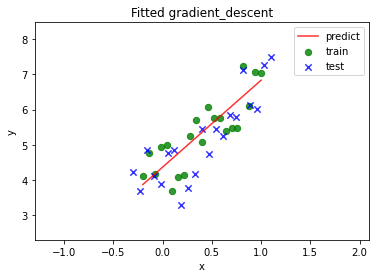


Стохастический градиентный спуск (скорость обучения =  1.0 ):

w =  [4.42845391 1.67856558]  Количество итераций =  100

Ошибка на обучающем наборе:
MSE =  0.40453402795665094  scikit-learn MSE =  0.40453402795665094
RMSE =  0.6360298954897097
R2 =  0.5882875887924823  scikit-learn R2_score =  0.5882875887924823

Ошибка на тестовом наборе:
MSE =  0.47747620822761955  scikit-learn MSE =  0.47747620822761955
RMSE =  0.690996532717509
R2 =  0.6542053460439904  scikit-learn R2_score =  0.6542053460439904


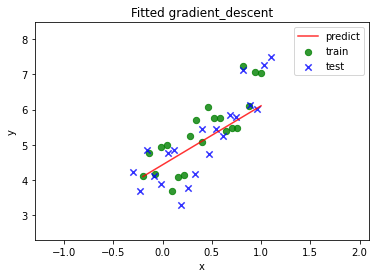


Стохастический градиентный спуск (скорость обучения =  2.0 ):

w =  [ 2.50242412e+15 -8.74680534e+15]  Количество итераций =  100

Ошибка на обучающем наборе:
MSE =  1.1091481423153298e+31  scikit-learn MSE =  1.1091481423153298e+31
RMSE =  3330387578518947.5
R2 =  -1.128829775743654e+31  scikit-learn R2_score =  -1.128829775743654e+31

Ошибка на тестовом наборе:
MSE =  1.473829619737677e+31  scikit-learn MSE =  1.473829619737677e+31
RMSE =  3839048866239757.5
R2 =  -1.0673671160267603e+31  scikit-learn R2_score =  -1.0673671160267603e+31


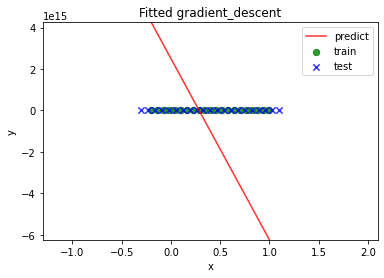

In [476]:
w_0 = np.array([1.0, 1.0])

for learn_rate in [0.5, 1.0, 2.0]:
    w, k = stochastic_gradient_descent(X_train, y_train, w_0, learn_rate, n_iter=100, eps=1e-06)
    print('\nСтохастический градиентный спуск (скорость обучения = ', learn_rate, '):\n')
    print('w = ', w, ' Количество итераций = ', k)
    print('\nОшибка на обучающем наборе:')
    y_predict_train = lin_f_predict(X_train, w)
    print('MSE = ', MSE(y_train, y_predict_train), ' scikit-learn MSE = ', mean_squared_error(y_train, y_predict_train))
    print('RMSE = ', RMSE(y_train, y_predict_train))
    print('R2 = ', R2(y_train, y_predict_train), ' scikit-learn R2_score = ', r2_score(y_train, y_predict_train))
    print('\nОшибка на тестовом наборе:')
    y_predict_test = lin_f_predict(X_test, w)
    print('MSE = ', MSE(y_test, y_predict_test), ' scikit-learn MSE = ', mean_squared_error(y_test, y_predict_test))
    print('RMSE = ', RMSE(y_test, y_predict_test))
    print('R2 = ', R2(y_test, y_predict_test), ' scikit-learn R2_score = ', r2_score(y_test, y_predict_test))
    paint_2(X_train, y_train, X_test, y_test, y_predict_train)

**Задание 4. Градиентный спуск по мини-батчам**  

Реализуйте функцию `mini_batch_gradient_descent`, которая находит вектор весов на основе градиентного спуска по мини-батчам (вычисление градиента на подмножестве случайно выбранных примеров). Размер мини-батча должен быть параметром функции.  

На наборе данных `ml_lab1_train.txt`/`ml_lab1_test.txt` оцените количество шагов для получения решения при разных значениях скорости спуска $\eta_k$, например, $\eta_k = \{0.5, 1.0, 2.0\}$.

In [478]:
# Градиентный спуск по мини-батчам (вычисление градиента на подмножестве из batch_size случайно выбранных примеров)
def mini_batch_gradient_descent(X, y, w, learn_rate, n_iter, eps, batch_size):
    #x = np.array([np.ones(X.shape[0]), X]).T
    n_obs = X.shape[0] # Количество наблюдений (значений)
    xy = np.c_[X.reshape(n_obs, 1), y.reshape(n_obs, 1)] # Объединение массивов x и y в один
    k_iter = 0
    n = learn_rate
    for _ in range(n_iter):
        rng.shuffle(xy) # Перемешивание x и y
        start = np.random.randint(n_obs-batch_size) # Выбор случайного значения
        stop = start + batch_size
        x_batch, y_batch = np.array(xy[start:stop, :-1].ravel().tolist()), np.array(xy[start:stop, -1:].ravel().tolist()) # Формирование мини-батча и разделение x и y
        x_batch = np.array([np.ones(x_batch.shape[0]), x_batch]).T            
        gradient = 2 * np.dot(x_batch.T, np.dot(x_batch, w) - y_batch) / y_batch.shape[0]
            
        diff = learn_rate * gradient
        w -= diff
        k_iter += 1    
        if np.all(np.abs(diff) <= eps):
            break     
        learn_rate -= n / n_iter
    return w, k_iter


Стохастический градиентный спуск по мини-пакетам (скорость обучения =  0.5 ):

w =  [4.44674684 2.25706083]  Количество итераций =  100
Ошибка на обучающем наборе:
MSE =  0.2969829128130008  scikit-learn MSE =  0.2969829128130008
RMSE =  0.5449613865339459
R2 =  0.6977471790462707  scikit-learn R2_score =  0.6977471790462707

Ошибка на тестовом наборе:
MSE =  0.4375532565919378  scikit-learn MSE =  0.4375532565919378
RMSE =  0.6614780847404831
R2 =  0.6831180813968312  scikit-learn R2_score =  0.6831180813968312


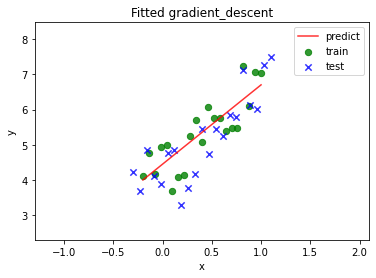


Стохастический градиентный спуск по мини-пакетам (скорость обучения =  1.0 ):

w =  [4.42155833 2.33467792]  Количество итераций =  100
Ошибка на обучающем наборе:
MSE =  0.2974150552039475  scikit-learn MSE =  0.2974150552039475
RMSE =  0.5453577314056779
R2 =  0.6973073683666591  scikit-learn R2_score =  0.6973073683666591

Ошибка на тестовом наборе:
MSE =  0.43867523228093547  scikit-learn MSE =  0.43867523228093547
RMSE =  0.6623256240558231
R2 =  0.6823055316018076  scikit-learn R2_score =  0.6823055316018076


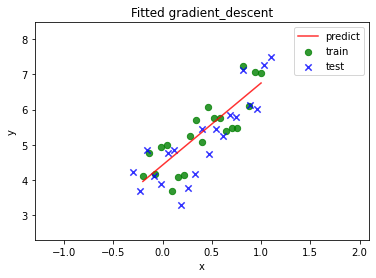


Стохастический градиентный спуск по мини-пакетам (скорость обучения =  2.0 ):

w =  [ 3.09468516e+16 -6.23311435e+16]  Количество итераций =  100
Ошибка на обучающем наборе:
MSE =  5.490155698487069e+32  scikit-learn MSE =  5.490155698487069e+32
RMSE =  2.3431081277839204e+16
R2 =  -5.587577519612319e+32  scikit-learn R2_score =  -5.587577519612319e+32

Ошибка на тестовом наборе:
MSE =  7.342087425055291e+32  scikit-learn MSE =  7.342087425055291e+32
RMSE =  2.709628650766612e+16
R2 =  -5.317237878481804e+32  scikit-learn R2_score =  -5.317237878481804e+32


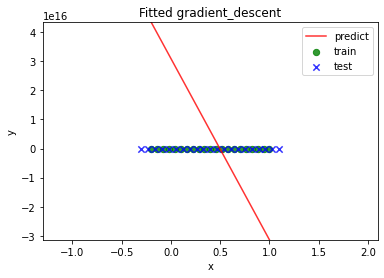

In [479]:
w_0 = np.array([1.0, 1.0])
rng = np.random.default_rng()

for learn_rate in [0.5, 1.0, 2.0]:
    w, k = mini_batch_gradient_descent(X_train, y_train, w_0, learn_rate, n_iter=100, eps=1e-06, batch_size=10)
    print('\nСтохастический градиентный спуск по мини-пакетам (скорость обучения = ', learn_rate, '):\n')
    print('w = ', w, ' Количество итераций = ', k)
    print('Ошибка на обучающем наборе:')
    y_predict_train = lin_f_predict(X_train, w)
    print('MSE = ', MSE(y_train, y_predict_train), ' scikit-learn MSE = ', mean_squared_error(y_train, y_predict_train))
    print('RMSE = ', RMSE(y_train, y_predict_train))
    print('R2 = ', R2(y_train, y_predict_train), ' scikit-learn R2_score = ', r2_score(y_train, y_predict_train))
    print('\nОшибка на тестовом наборе:')
    y_predict_test = lin_f_predict(X_test, w)
    print('MSE = ', MSE(y_test, y_predict_test), ' scikit-learn MSE = ', mean_squared_error(y_test, y_predict_test))
    print('RMSE = ', RMSE(y_test, y_predict_test))
    print('R2 = ', R2(y_test, y_predict_test), ' scikit-learn R2_score = ', r2_score(y_test, y_predict_test))
    paint_2(X_train, y_train, X_test, y_test, y_predict_train)